In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('./dataset/headbrain.csv')
data = data.drop(['Gender', 'Age Range'], axis=1)
data.head()

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590


In [3]:
data.describe()

,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000
mean,3633.991561,1282.873418
std,365.261422,120.340446
min,2720.000000,955.000000
25%,3389.000000,1207.000000
50%,3614.000000,1280.000000
75%,3876.000000,1350.000000
max,4747.000000,1635.000000


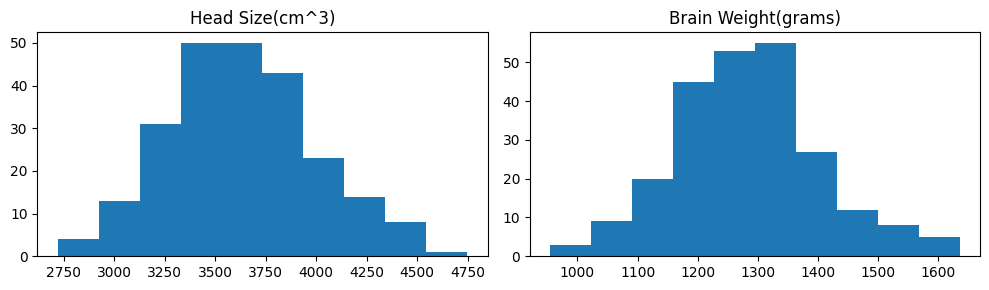

In [4]:
plt.figure(figsize=(10,3))
for i, col in enumerate(data.columns):
    plt.subplot(1,2,i+1)
    plt.hist(data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

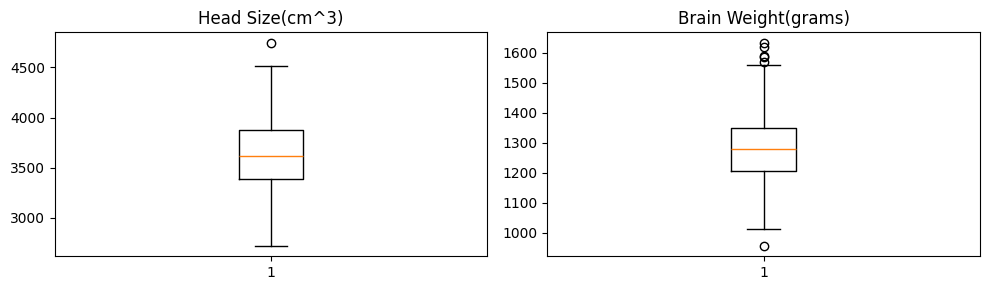

In [5]:
plt.figure(figsize=(10,3))
for i, col in enumerate(data.columns):
    plt.subplot(1,2,i+1)
    plt.boxplot(data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [6]:
scaler = StandardScaler()

data = scaler.fit_transform(data)
data = pd.DataFrame(data)
data.rename({0: 'Head Size(cm^3)', 1: 'Brain Weight(grams)'}, axis=1, inplace=True)

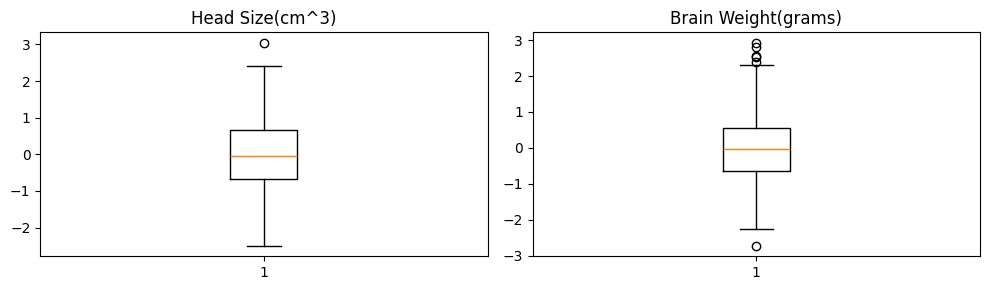

In [7]:
plt.figure(figsize=(10,3))
for i, col in enumerate(data.columns):
    plt.subplot(1,2,i+1)
    plt.boxplot(data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [8]:
X = data['Head Size(cm^3)']             # Independent Variable
y = data['Brain Weight(grams)']         # Dependent Variable

print(f"Shape of features: {X.shape}")
print(f"Shape of labels: {y.shape}")

Shape of features: (237,)
Shape of labels: (237,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

In [11]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (189, 1)
Shape of X_test: (48, 1)
Shape of y_train: (189,)
Shape of y_test: (48,)


In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [13]:
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

R2 Score: 0.6523706172415185


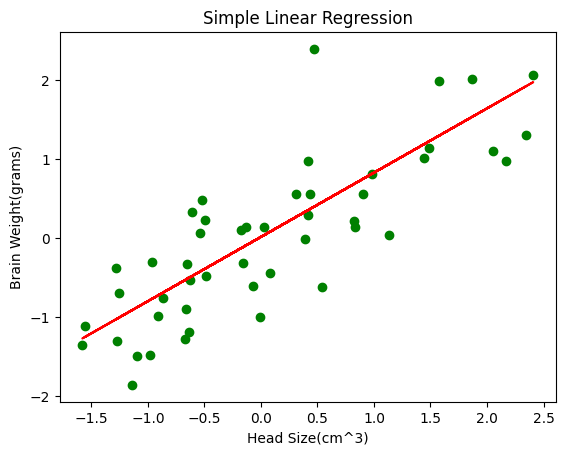

In [14]:
plt.scatter(X_test, y_test, c="g")
plt.plot(X_test, y_pred, c="r")
plt.xlabel(data.columns[0]), plt.ylabel(data.columns[1])
plt.title("Simple Linear Regression")
plt.show()